In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from larcv import larcv
%matplotlib inline

In [3]:
# filename = '/Users/mdeltutt/Downloads/out_sbnd_3d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i1000.h5'
# dim = '3d'

filename = '/Users/mdeltutt/Downloads/out_sbnd_2d_n5_r6_mb64_bpl2_nf32_lrstriangle_clr_classic_i600.h5'
dim = '2d'

df = pd.DataFrame(columns=['pdg', 'true_energy', 'tot_charge', 'tot_charge_voxels'])

io = larcv.IOManager()
io.add_in_file(filename)
io.initialize()

counter = 0
for i in range(io.get_n_entries()):
    if i % 1000 == 0:
        print("On entry ", i, " of ", io.get_n_entries())
        
    io.read_entry(i)
    
    event_particle = larcv.EventParticle.to_particle(io.get_data("particle", "sbndsegmerged"))
    
    if dim == '3d':
        
        event_sparse_cluster = larcv.EventSparseCluster3D.to_sparse_cluster(io.get_data("cluster3d", "sbndsegmerged"))
        clusters = event_sparse_cluster.as_vector().front().as_vector()
    
        for j, particle in enumerate(event_particle.as_vector()):
            cluster = clusters[j]
        
            sum_charge = 0
            for voxel in cluster.as_vector():
                sum_charge += voxel.value()
                
            df.loc[counter] = [particle.pdg_code(), particle.energy_init(), sum_charge]
            counter += 1
            
#         event_sparsetensor = larcv.EventSparseTensor3D.to_sparse_tensor(io.get_data("sparse3d", "sbndvoxels"))
#         sparse = event_sparsetensor.as_vector()
    
#         sum_charge_voxel = 0
#         for voxel is sparse:
#             sum_charge_voxel += voxel.value()
            
            
    if dim == '2d':
        
        part_to_charge = {}
        part_to_energy = {}
        
        event_sparse_cluster = larcv.EventSparseCluster2D.to_sparse_cluster(io.get_data("cluster2d", "sbndsegmerged"))
        
        for j, particle in enumerate(event_particle.as_vector()):
            
            sum_charge = 0
            
            for plane in range(0, 3):
            
                clusters = event_sparse_cluster.sparse_cluster(plane)
                clusters = clusters.as_vector()
                cluster = clusters[j]
                
                sum_charge = 0
                for voxel in cluster.as_vector():
                    sum_charge += voxel.value()
                
#                 if particle.pdg_code() in part_to_charge:
#                     part_to_charge[particle.pdg_code()] += sum_charge
#                 else:
#                     part_to_charge[particle.pdg_code()] = sum_charge
#                     part_to_energy[particle.pdg_code()] = particle.energy_init()
                    
            df.loc[counter] = [particle.pdg_code(), particle.energy_init(), sum_charge]
            counter += 1
#         for pdg, ene in part_to_charge.items():
#             df.loc[counter] = [pdg, part_to_energy[pdg], ene]
#             counter += 1
        
        

On entry  0  of  7348
On entry  1000  of  7348
On entry  2000  of  7348
On entry  3000  of  7348
On entry  4000  of  7348
On entry  5000  of  7348
On entry  6000  of  7348
On entry  7000  of  7348


In [4]:
df.head(30)

,pdg,true_energy,tot_charge
0,13.0,621.783611,286.194857
1,2212.0,1360.406477,407.688185
2,22.0,187.504816,185.263948
3,22.0,110.359900,104.896488
4,2212.0,1113.515811,0.000000
5,2212.0,1146.875404,207.603124
6,2212.0,945.762427,7.490414
7,2212.0,947.732548,9.460535
8,2212.0,938.469596,0.000000
9,2212.0,938.346114,0.000000


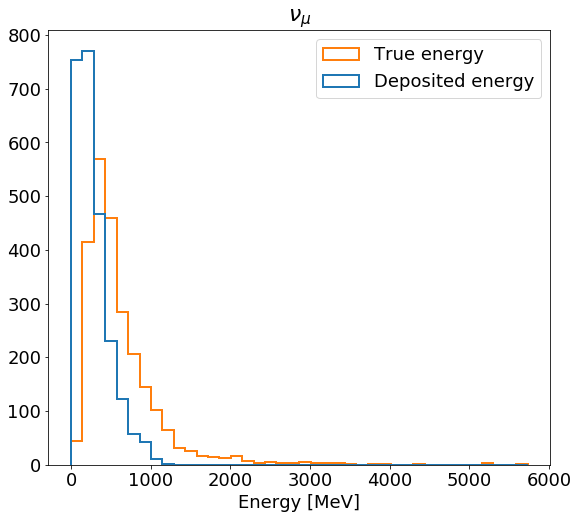

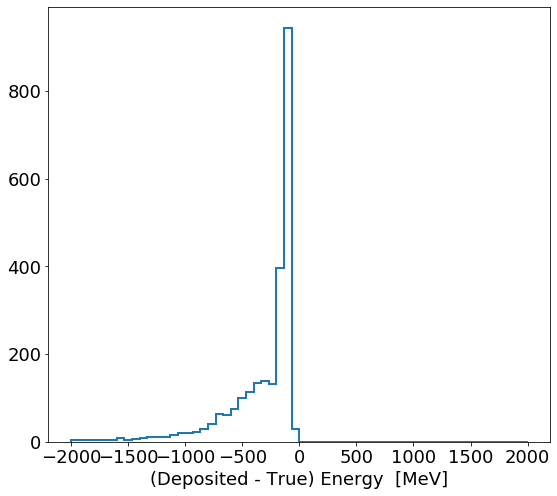

In [16]:
df_sel = df.query('pdg == 13')

fig = plt.figure(figsize=(9,8),facecolor='w')

plt.hist([df_sel['tot_charge'],df_sel['true_energy']], histtype='step', lw=2, bins=40, label=['Deposited energy', 'True energy'])
# plt.hist(df_ele['true_energy'], bins=40, label='All $\\nu_e$')

plt.xlabel('Energy [MeV]', fontsize=18)
plt.title(r'$\nu_\mu$', loc='center', fontsize=22)
plt.legend(fontsize=18, loc='best')
plt.tick_params(labelsize=18)
plt.savefig('muon_true_deposited_energy.pdf')
plt.show()

fig = plt.figure(figsize=(9,8),facecolor='w')

plt.hist(df_sel['tot_charge']-df_sel['true_energy'], histtype='step', lw=2, bins=60, range=(-2000,2000), label='Deposited energy')
# plt.hist(df_ele['true_energy'], bins=40, label='All $\\nu_e$')

plt.xlabel('(Deposited - True) Energy  [MeV]', fontsize=18)
# plt.legend(fontsize=18, loc='best')
plt.tick_params(labelsize=18)

plt.savefig('muon_true_minus_deposited_energy.pdf')
plt.show()

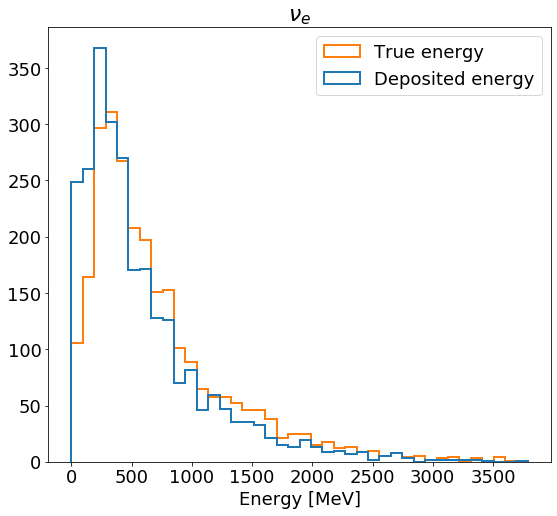

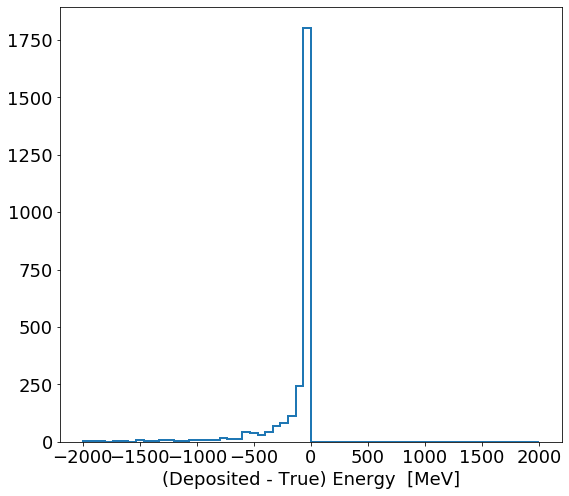

In [17]:
df_sel = df.query('pdg == 11')

fig = plt.figure(figsize=(9,8),facecolor='w')

plt.hist([df_sel['tot_charge'],df_sel['true_energy']], histtype='step', lw=2, bins=40, label=['Deposited energy', 'True energy'])
# plt.hist(df_ele['true_energy'], bins=40, label='All $\\nu_e$')

plt.xlabel('Energy [MeV]', fontsize=18)
plt.title(r'$\nu_e$', loc='center', fontsize=22)
plt.legend(fontsize=18, loc='best')
plt.tick_params(labelsize=18)
plt.savefig('electron_true_deposited_energy.pdf')
plt.show()

fig = plt.figure(figsize=(9,8),facecolor='w')

plt.hist(df_sel['tot_charge']-df_sel['true_energy'], histtype='step', lw=2, bins=60, range=(-2000,2000), label='Deposited energy')
# plt.hist(df_ele['true_energy'], bins=40, label='All $\\nu_e$')

plt.xlabel('(Deposited - True) Energy  [MeV]', fontsize=18)
# plt.legend(fontsize=18, loc='best')
plt.tick_params(labelsize=18)

plt.savefig('electron_true_minus_deposited_energy.pdf')
plt.show()